# PHYS 250 Lecture &mdash; Assignment 2
~~~
William Thompson        10091404           12wt9
~~~

In [193]:
# Import * from matplotlib.pyplot and numpy, and show figures inline
%pylab inline

# Symbolic differentiation
import sympy
sympy.init_printing()

# Useful for sem method, standard-error-on-mean
import scipy.stats as stats

# Display rich text and formulas in Python output
from IPython.display import Markdown

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [194]:
(
    x,
    y,
    sigmax,
    sigmay,
    sigmaxy # Covariance factor
) = sympy.symbols('x y sigma_X sigma_y sigma_xy')

# Define symbolic function for error propagation
F_sym = sympy.exp(-(x-1.1)**2/0.1)*sympy.exp(-(y-2.9)**2/0.1)
# Convert to numpy formula for vector calculations
F = sympy.lambdify((x, y), F_sym, 'numpy')

x_val = 1.0
x_val_d = 0.05
y_val = 3.0
y_val_d = 0.05


### A)

In [195]:
X = linspace(x_val-x_val_d, x_val+x_val_d, 1000)
Y = linspace(y_val-y_val_d, y_val+y_val_d, 1000)

max_vals, min_vals = [], []
for xi in X:
    fs = F(xi,Y)
    max_vals.append(max(fs))
    min_vals.append(min(fs))
max_val = max(max_vals)
min_val = min(min_vals)
    
F_best = (max_val+min_val)/2
F_d = (max_val-min_val)/2

Markdown(
    'Using the min-max method, $F = {:.2f} \pm {:.2f}$'
    .format(F_best, F_d)
)

Using the min-max method, $F = 0.79 \pm 0.16$

### B)

In [196]:
dFdx = sympy.diff(F_sym, x)
dFdy = sympy.diff(F_sym, y)
F_sym_err = sympy.sqrt((dFdx*sigmax)**2 + (dFdy*sigmay)**2)

F_err = F_sym_err.evalf(subs={
    x: x_val,
    y: y_val,
    sigmax: x_val_d,
    sigmay: y_val_d,
})

## NEED COVARIANCe FACTOR

F_best = F(x_val, y_val)

Markdown(
    'Using the derivative method, $F = {:.2f} \pm {:.2f}$'
    .format(F_best, F_err)
)

Using the derivative method, $F = 0.82 \pm 0.12$

### C)

The result from part B has a slightly larger value for the best estimate of F then part A, and has a somewhat smaller uncertainty.

It is expected that the min-max method will give a larger estimate than the derivative method. The min-max method gives the upper limit for the uncertainty, whereas the derivative method gives the standard deviation of the measurement, if the measurement is normally distributed, i.e. it is assuming that the measurements do not all lie at the extreema of their ranges.

It is also quite probably that the the two methods will give different answers for the best estimate. Using the derivative method, we are essentially using the mean value of F. In the min-max method, we are blindly splitting the difference between the highest and lowest values.


### D)

In [197]:
F_sym_err_cov = sympy.sqrt(
    (dFdx*sigmax)**2 +
    (dFdy*sigmay)**2 +
    2*dFdx*dFdy*sigmaxy
)

F_err_cov = F_sym_err_cov.evalf(subs={
    x: x_val,
    y: y_val,
    sigmax: x_val_d,
    sigmay: y_val_d,
    sigmaxy: -0.5
})

F_best = F(x_val, y_val)

Markdown(
    'Using the derivative method, $F = {:.2f} \pm {:.1f}$'
    .format(F_best, F_err_cov)
)

Using the derivative method, $F = 0.82 \pm 1.6$

This uncertainty is significantly larger than the result from part B; in fact, it is larger by an order of magnitude. The covariance factor indicates that these measurements are anti-correlated, hence a larger uncertainty.

## Question 2

### A)

In [200]:
micrometer_d = 0.001*1e-3 # mm -> m
N = 52
N_d = sqrt(N)

deck = 1.575*1e-2 # cm -> m
deck_d = micrometer_d/2  # Half the smallest division

card = deck/deck_N
card_d = sqrt( (deck_d/N)**2 + (-N_d/N**2 )**2)

Markdown(
    'The thickness of a single playing card is {:.2e}m $\pm$ {:.0e}m'
    .format(card, card_d)
)

The thickness of a single playing card is 3.03e-04m $\pm$ 3e-03m

### B)
To lower the uncertainty to 0.00005mm a deck of approximately 70000 cards would be required.

## Question 3: Statistical Data

In [201]:
data = loadtxt('./a2data')
X = data[:,0]
Y = data[:,1]

### A)

In [202]:
sigmax = std(X, ddof=1)
sigmay = std(Y, ddof=1)

Markdown('''
| | $X$ | $Y$ |
|-|-----|-----|
|Mean|{:.2f}|{:.2f}|
|Std.Dev.|{:.2f}|{:.2f}|
|Err of Mean|{:.2f}|{:.2f}|
'''.format(
    mean(X), mean(Y),
    sigmax, sigmay,
    stats.sem(X, ddof=1), stats.sem(Y, ddof=1)
))


| | $X$ | $Y$ |
|-|-----|-----|
|Mean|20.16|22.06|
|Std.Dev.|5.01|6.49|
|Err of Mean|0.50|0.65|


### B)

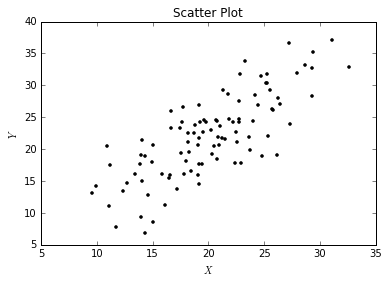

In [203]:
plot(X,Y, 'k.')
xlabel('$X$')
ylabel('$Y$')
title('Scatter Plot');

### C)

In [204]:
sigmaxy = sum((X-mean(X))*(Y-mean(Y)))/(X.size-1)
rhoxy = sigmaxy/(sigmax*sigmay)

Markdown('''
- The covariance factor is ${:.1f}$
- The correlation factor is ${:.1f}$
'''.format(sigmaxy, rhoxy))



- The covariance factor is $25.2$
- The correlation factor is $0.8$


The correlation factor is consistent with the scatter plot&mdash;a positive relationship with a slope slightly less than 1. The covariance factor is also qualitatively consistent with the data: the $x$ and $y$ values tend to be in the same directions from their means at the same time.

### D)

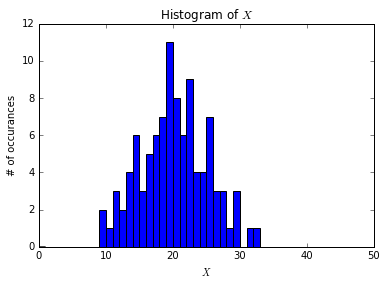

In [205]:
hist(X, bins=linspace(0,50,51))
title('Histogram of $X$')
ylabel('# of occurances')
xlabel('$X$');

### E)

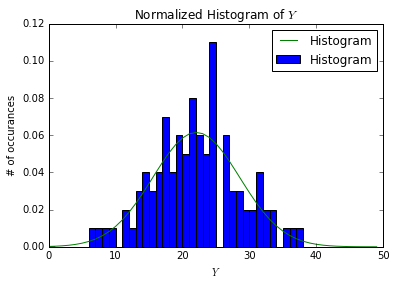

In [206]:

yvals = arange(0,50)
F = exp(-(yvals-mean(Y))**2/(2*sigmay**2))/(sigmay*sqrt(2*pi))

hist(Y, bins=linspace(0,50,51), normed=True, label='Histogram')
plot(yvals, F, label='Histogram')
title('Normalized Histogram of $Y$')
ylabel('# of occurances')
xlabel('$Y$')
legend();
